In [1]:
# EDA Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

Load the JSON file

In [2]:
# Load the posts dataset
posts_df = pd.read_json('/content/r_worldnews_posts.jsonl', lines=True)

# Load the comments dataset
comments_df = pd.read_json('/content/r_worldnews_comments.jsonl', lines=True)


In [3]:
# Quick look at posts
print("Posts dataset:")
print(posts_df.shape)
print(posts_df.columns)
print(posts_df.dtypes)

# Quick look at comments
print("\nComments dataset:")
print(comments_df.shape)
print(comments_df.columns)
print(comments_df.dtypes)


Posts dataset:
(376, 113)
Index(['_meta', 'all_awardings', 'allow_live_comments', 'approved_at_utc',
       'approved_by', 'archived', 'author', 'author_flair_background_color',
       'author_flair_css_class', 'author_flair_richtext',
       ...
       'user_reports', 'view_count', 'visited', 'whitelist_status', 'wls',
       'post_hint', 'preview', 'link_flair_template_id', 'crosspost_parent',
       'crosspost_parent_list'],
      dtype='object', length=113)
_meta                      object
all_awardings              object
allow_live_comments          bool
approved_at_utc           float64
approved_by               float64
                           ...   
post_hint                  object
preview                    object
link_flair_template_id     object
crosspost_parent           object
crosspost_parent_list      object
Length: 113, dtype: object

Comments dataset:
(17184, 72)
Index(['_meta', 'all_awardings', 'approved_at_utc', 'approved_by', 'archived',
       'associated_awar

**Check for Missing Values and Duplicates**

In [8]:
 # Drop columns that contain unhashable types: dict or list
posts_dup_check = posts_df.drop(columns=[
    col for col in posts_df.columns
    if posts_df[col].apply(lambda x: isinstance(x, (dict, list))).any()
])

comments_dup_check = comments_df.drop(columns=[
    col for col in comments_df.columns
    if comments_df[col].apply(lambda x: isinstance(x, (dict, list))).any()
])

# Check duplicates
print("\nDuplicate posts:", posts_dup_check.duplicated().sum())
print("Duplicate comments:", comments_dup_check.duplicated().sum())


Duplicate posts: 0
Duplicate comments: 0


**Descriptive Statistics and Visualizations**

In [9]:
print("Posts Dataset - Descriptive Statistics:\n")
print(posts_df.describe())

print("\nComments Dataset - Descriptive Statistics:\n")
print(comments_df.describe())

# Calculate text lengths
posts_df['title_length'] = posts_df['title'].apply(lambda x: len(str(x)))
posts_df['selftext_length'] = posts_df['selftext'].apply(lambda x: len(str(x)))
comments_df['comment_length'] = comments_df['body'].apply(lambda x: len(str(x)))



Posts Dataset - Descriptive Statistics:

       approved_at_utc  approved_by  author_flair_css_class  \
count              0.0          0.0                     0.0   
mean               NaN          NaN                     NaN   
std                NaN          NaN                     NaN   
min                NaN          NaN                     NaN   
25%                NaN          NaN                     NaN   
50%                NaN          NaN                     NaN   
75%                NaN          NaN                     NaN   
max                NaN          NaN                     NaN   

       author_patreon_flair  author_premium  banned_at_utc  banned_by  \
count                 365.0      365.000000            0.0        0.0   
mean                    0.0        0.060274            NaN        NaN   
std                     0.0        0.238320            NaN        NaN   
min                     0.0        0.000000            NaN        NaN   
25%                     0.

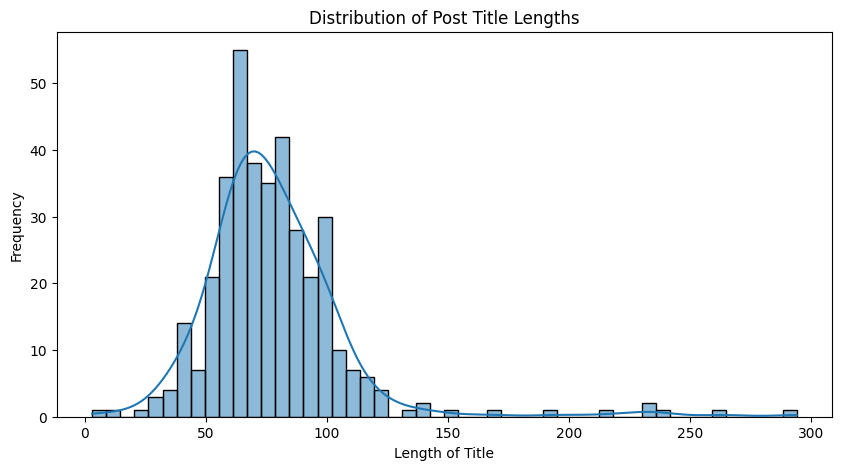

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.histplot(posts_df['title_length'], bins=50, kde=True)
plt.title('Distribution of Post Title Lengths')
plt.xlabel('Length of Title')
plt.ylabel('Frequency')
plt.show()


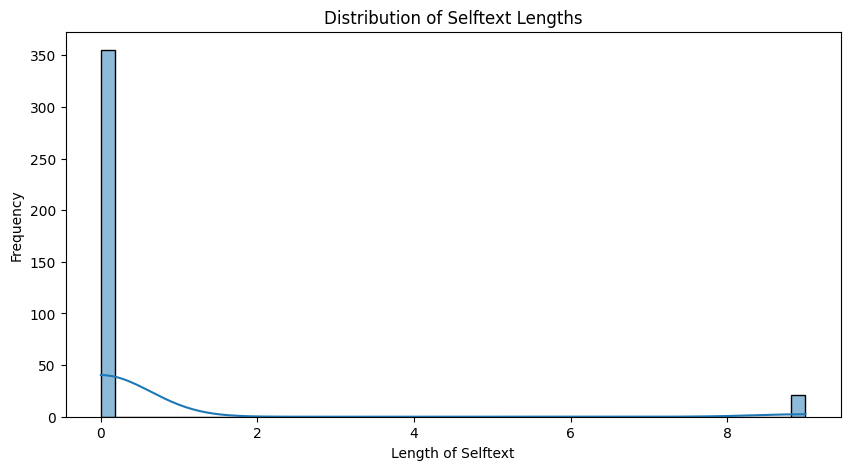

In [11]:
plt.figure(figsize=(10,5))
sns.histplot(posts_df['selftext_length'], bins=50, kde=True)
plt.title('Distribution of Selftext Lengths')
plt.xlabel('Length of Selftext')
plt.ylabel('Frequency')
plt.show()


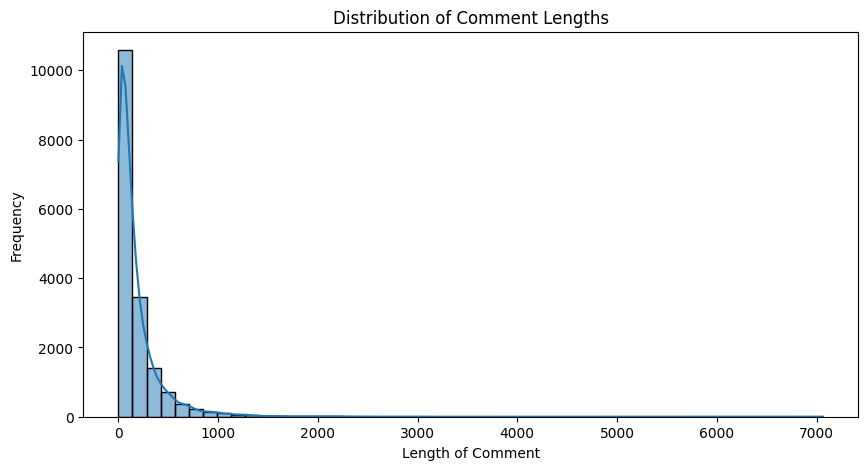

In [12]:
plt.figure(figsize=(10,5))
sns.histplot(comments_df['comment_length'], bins=50, kde=True)
plt.title('Distribution of Comment Lengths')
plt.xlabel('Length of Comment')
plt.ylabel('Frequency')
plt.show()


In [13]:
!pip install wordcloud


In [14]:
from wordcloud import WordCloud, STOPWORDS

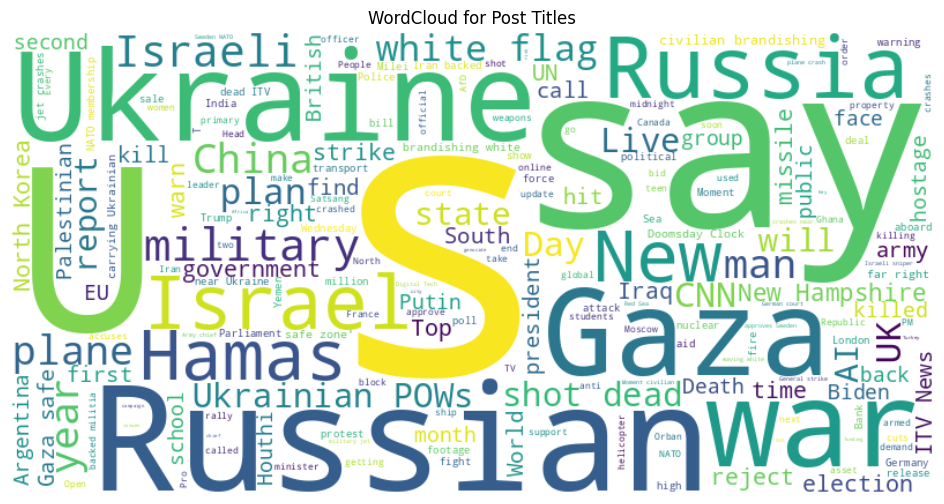

In [15]:
# Generate text
post_titles_text = " ".join(str(title) for title in posts_df['title'].dropna())

# Create and plot WordCloud
wordcloud_posts = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(post_titles_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_posts, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for Post Titles')
plt.show()

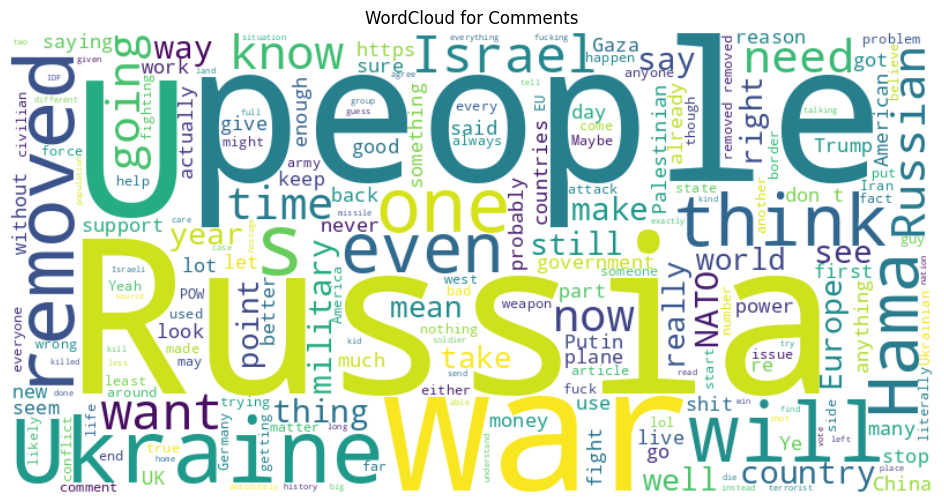

In [16]:
# Generate text
comments_text = " ".join(str(comment) for comment in comments_df['body'].dropna())

# Create and plot WordCloud
wordcloud_comments = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(comments_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_comments, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for Comments')
plt.show()

In [17]:
from collections import Counter

# Function to clean and split text
def get_words(text_series):
    words = []
    for text in text_series.dropna():
        for word in str(text).lower().split():
            word = word.strip('.,!?"\'')
            if word not in STOPWORDS and len(word) > 2:
                words.append(word)
    return words

# Get words from post titles
post_words = get_words(posts_df['title'])

# Get top 20
post_word_counts = Counter(post_words).most_common(20)

# Display
print("Top 20 Words in Post Titles:")
for word, count in post_word_counts:
    print(f"{word}: {count}")

Top 20 Words in Post Titles:
says: 30
gaza: 29
russian: 26
ukraine: 24
war: 21
new: 19
military: 19
israeli: 19
russia: 18
plane: 17
ukrainian: 16
israel: 15
white: 15
hamas: 15
north: 14
nato: 13
flag: 13
shot: 13
news: 13
crashes: 13
